### Sasanapuri Tarun
Data Science Intern at Oasis Infobyte

# EMAIL SPAM DETECTION WITH MACHINE LEARNING

### Task-4 Problem Statement
We’ ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.
In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’ s get
started!

### 1.Import Libraries

In [1]:
# For Data analysis, manipulation, and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For converting the text into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# For Training/testing, selecting a model, and evaluating a model performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
from sklearn.metrics import classification_report

/Users/tarunsasanapuri/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2.Load the Dataset

In [2]:
# read the spam dataset and display first 5 rows
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# last 5 rows
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### 3.Data Analysis

In [4]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# It gives the Dimension or the no of rows and columns
df.shape

(5572, 5)

In [6]:
# It shows only columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
# Descriptive Statistics summary of a given dataset
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
# size of the dataset
df.size

27860

In [9]:
# Check the null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### 4.Data Cleaning

In [10]:
# Remove this column
rem_col=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df=df.drop(rem_col,axis=1)

In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# Rename the column name for a better understanding
rename_col={"v1":"Category","v2":"Text"}
df=df.rename(rename_col,axis=1)

In [13]:
df

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
# use labelEncoder on the category column to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Category']=encoder.fit_transform(df["Category"])
df.head()

,Category,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# check for duplicates
df.duplicated().sum()

403

In [16]:
# Delete Duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
# No of rows and columns after removing duplicates
df.shape

(5169, 2)

### 5.Data Visualization

In [19]:
# Count the category values
category=df['Category'].value_counts()
print(category)

0    4516
1     653
Name: Category, dtype: int64


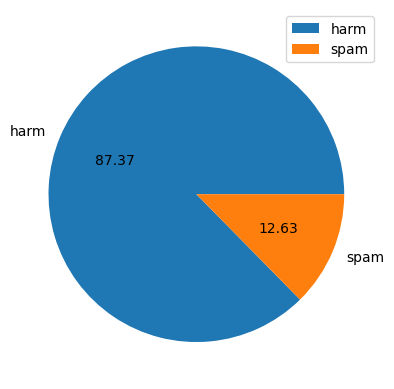

In [21]:
#plot the pie chart of the category values
plt.pie(category,labels=['harm','spam'],autopct='%0.2f')
plt.legend()
plt.show()

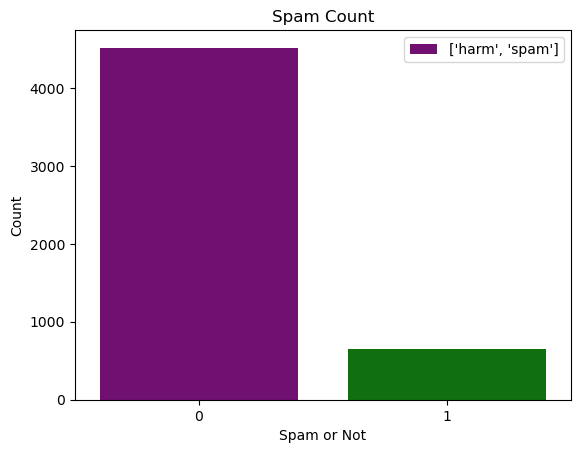

In [25]:
# count plot for category
c=['purple','green']
l=['harm','spam']
sns.countplot(data=df,x='Category',palette=c,label=l)
plt.xlabel("Spam or Not")
plt.ylabel("Count")
plt.title("Spam Count")
plt.legend()
plt.show()

### 6.Splitting the data into train and test

In [30]:
X=df['Text']
y=df["Category"]

In [31]:
print(X,'\n\n',y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object 

 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5169, dtype: int64


In [32]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print("X",X.shape,"X_train",X_train.shape,"X_test",X_test.shape)
print("y",y.shape,"y_train",y_train.shape,"y_test",y_test.shape)

X (5169,) X_train (4135,) X_test (1034,)
y (5169,) y_train (4135,) y_test (1034,)


### 7.Extract the Features

#### TfidfVectorizer is a type of feature extraction
- It is a very popular technique for transforming text data into a numerical representation that can be used by machine learning algorithms.
- TfidfVectorizer works by first calculating the term frequency (TF) and inverse document frequency (IDF) for each word in the text corpus. TF measures the number of times a word appears in a document, while IDF measures how important a word is to the corpus as a whole.
- The TF-IDF score for a word is calculated by multiplying the TF and IDF scores.

In [38]:
# Stop_words are a set of commonly used words in a language that are often removed from text data before ml algorithms are applied.
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

print(X_train,X_train_feature)

2228                       Those were my exact intentions
5529                            What about this one then.
2149                   Waaaat?? Lololo ok next time then!
5058    Free video camera phones with Half Price line ...
5051    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: Text, Length: 4135, dtype: object   (0, 3545)	0.7455593142248959
  (0, 2588)	0.6664392762829205
  (2, 6589)	0.3136674984299076
  (2, 4696)	0.29654379102529516
  (2, 4002)	0.6378379419700079
  (2, 6999)	0.6378379419700079
  (3, 564)	0.2785767488573773
  (3, 1534)	0.23384958966251285
  (3, 52)	0.26549489341098675
  (3, 4344)	0.22076773421612225
  (3, 6770)

In [39]:
#Test data in Vectorized form
print(X_test,X_test_feature)

1617                        Did u download the fring app?
2064    Pass dis to all ur contacts n see wat u get! R...
1272                                                Ok...
3020                       Am in film ill call you later.
3642    Sorry, left phone upstairs. OK, might be hecti...
                              ...                        
4146    Pls help me tell sura that i'm expecting a bat...
1208                      Also maaaan are you missing out
4795    URGENT This is our 2nd attempt to contact U. Y...
3575    The sign of maturity is not when we start sayi...
2820                Oh god..taken the teeth?is it paining
Name: Text, Length: 1034, dtype: object   (0, 2350)	0.6248448031170994
  (0, 2218)	0.41649895656656905
  (0, 969)	0.6603768554367367
  (1, 7209)	0.206445043140504
  (1, 7151)	0.33592749605615635
  (1, 7052)	0.11915863336196834
  (1, 7030)	0.16796374802807817
  (1, 6867)	0.09539871110957399
  (1, 6550)	0.18453673975730422
  (1, 6365)	0.18017747272491885
  (1, 5

### 8.Train a Model

In [42]:
# RandomForest Classifier
model = RandomForestClassifier()
model.fit(X_train_feature,y_train)

RandomForestClassifier()

### 9.Model Evaluation

In [45]:
#Predict Test data and check the performance of model using accuracy score, MAE and MSE
y_test_pred = model.predict(X_test_feature)
print("Accuracy:",accuracy_score(y_test,y_test_pred))

print("\nmean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("r2_score:",r2_score(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))

Accuracy: 0.9729206963249516

mean_absolute_error: 0.027079303675048357
mean_squared_error: 0.027079303675048357
r2_score: 0.775400488732012

classification_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.99      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



### 10.Email Checking

In [48]:
#function for checking whether an email is spam?

def spamchecking(mail):
  input = feature_extraction.transform(mail)
  prediction = model.predict(input)

  if prediction == 1:
    return "Email is Spam"
  else:
    return "Email is not Spam"


In [49]:
mail1 = ["""These brand new domain extensions were recently approved by ICANN and have the same rights as the original .COM and .NET domain names.
The biggest benefit is of-course that the .BIZ and .INFO domain names are currently more available.
i.e. it will be much easier to register an attractive and easy-to-remember domain name for the same price.  Visit: http://www.affordable-domains.com today for more info."""]

print(spamchecking(mail1))

Email is Spam


In [50]:
mail2 = ["""The Future of Remote Work in Tech Sector 🌐
Welcome to our in-depth exploration of the future of remote work in the tech sector! In this comprehensive newsletter by Scaler Tech,
we'll take a deep dive into the dynamic world of remote work, the transformative tech tools that drive it, and what lies ahead on the horizon!
"""]

print(spamchecking(mail2))

Email is not Spam
